# Figures

In [145]:
setwd("~/Dropbox/OMP\ shared/peter_wu/1st_paper_nichols_reanalysis/github/Systematic-analyses-ecoli-phenotypes/Nichols_data_mining_code")
source("Nichols_preload.R")
df=strain1strain2_allAnnotations_allSimilarities
df$abs_pcc=abs(df$pcc)

## Violin plots

In [146]:
similarity_column="pcc"
y_lab="|PCC|"


##pwy
coAnnotated= ( df$pwy==1 )
pwy_abs_pcc=abs(df[[similarity_column]][coAnnotated]) #I am converting the |PCC| based distance back to just |PCC|


##pcomplex
coAnnotated= ( df$pcomplex==1 )
pcomplex_abs_pcc=abs(df[[similarity_column]][coAnnotated])

##pwy and pcomplex 
coAnnotated= ( rowSums(df[,c("pwy","pcomplex")])==2 )
pwyANDpcomplex_abs_pcc=abs(df[[similarity_column]][coAnnotated])


#all_annotSet
coAnnotated= ( rowSums(df[,c("pwy","pcomplex","operon","regulon","kegg_modules")])==5 )
all_annotSet_abs_pcc=abs(df[[similarity_column]][coAnnotated])


# all
All=abs(df[[similarity_column]])



# create dfs for ggplots
df_all=data.frame(all=All)
df1 = data.frame(pwy=pwy_abs_pcc)
df2 = data.frame(ptcom=pcomplex_abs_pcc)
df3=data.frame(pwyANDpcomplex=pwyANDpcomplex_abs_pcc)
df4=data.frame(all_annotSet=all_annotSet_abs_pcc)


xlabs=c("All gene pairs","Same EcoCyc pathways","Same EcoCyc protein\n complexes","Same EcoCyc pathways and\n protein complexes",
        "Intersection of 5\n annotation sets")

p=ggplot() +
  geom_violin(data = df_all,aes(xlabs[1],all)) +
  geom_boxplot(data = df_all,aes(xlabs[1],all),width=0.1,outlier.shape = NA)+
  geom_violin(data = df1,aes(xlabs[2],pwy)) +
  geom_boxplot(data = df1,aes(xlabs[2],pwy),width=0.1,outlier.shape = NA)+
  geom_violin(data = df2,aes(xlabs[3],ptcom))+
  geom_boxplot(data = df2,aes(xlabs[3],ptcom),width=0.1,outlier.shape = NA)+
  geom_violin(data = df3,aes(xlabs[4],pwyANDpcomplex))+
  geom_boxplot(data = df3,aes(xlabs[4],pwyANDpcomplex),width=0.1,outlier.shape = NA)+
  geom_violin(data = df4,aes(xlabs[5],all_annotSet))+
  geom_boxplot(data = df4,aes(xlabs[5],all_annotSet),width=0.1,outlier.shape = NA)+
  scale_x_discrete("",limits=xlabs)+ 
  #I want the x axis to be empty. And if I don't use this, the order is not right
  scale_y_continuous(y_lab)
#==============================================================================================================================

In [101]:
sapply(list(All,pwy_abs_pcc,pcomplex_abs_pcc,pwyANDpcomplex_abs_pcc,all_annotSet_abs_pcc),summary)

Min.,5.844943e-10,6.867954e-05,0.0002262647,0.001374414,0.001374414
1st Qu.,3.577661e-02,4.667298e-02,0.0606903285,0.106963272,0.268573069
Median,7.620925e-02,1.017261e-01,0.1501874284,0.331150129,0.633452716
Mean,9.259319e-02,1.622987e-01,0.2233055766,0.392953112,0.536487251
3rd Qu.,1.317850e-01,1.956068e-01,0.3097948347,0.704507848,0.784000527
Max.,9.590121e-01,9.575846e-01,0.9240197741,0.912624422,0.912624422


In [5]:
#significance test
wilcox.test(pwy_abs_pcc,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(pcomplex_abs_pcc,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(pwyANDpcomplex_abs_pcc,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(all_annotSet_abs_pcc,All,alternative="greater") #p-value < 2.2e-16


	Wilcoxon rank sum test with continuity correction

data:  pwy_abs_pcc and All
W = 3.6688e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  pcomplex_abs_pcc and All
W = 7077697152, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  pwyANDpcomplex_abs_pcc and All
W = 1501438380, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  all_annotSet_abs_pcc and All
W = 837237191, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


In [102]:
#fraction of gene pairs that have pcc>0.75
for(pcc in list(All,pwy_abs_pcc,pcomplex_abs_pcc,pwyANDpcomplex_abs_pcc,all_annotSet_abs_pcc)){
  paste0(sum(pcc>0.75)/length(pcc),"\n") %>% cat
}

##0.000160975842125407 0.0323616283549506 0.0490421455938697 0.194092827004219 0.301724137931034


#no. of gene pairs that have pcc>0.75
for(pcc in list(All,pwy_abs_pcc,pcomplex_abs_pcc,pwyANDpcomplex_abs_pcc,all_annotSet_abs_pcc)){
  paste0(sum(pcc>0.75),"\n") %>% cat
}
##1274 252 64 46 35

0.000160975842125407
0.0323616283549506
0.0490421455938697
0.194092827004219
0.301724137931034
1274
252
64
46
35


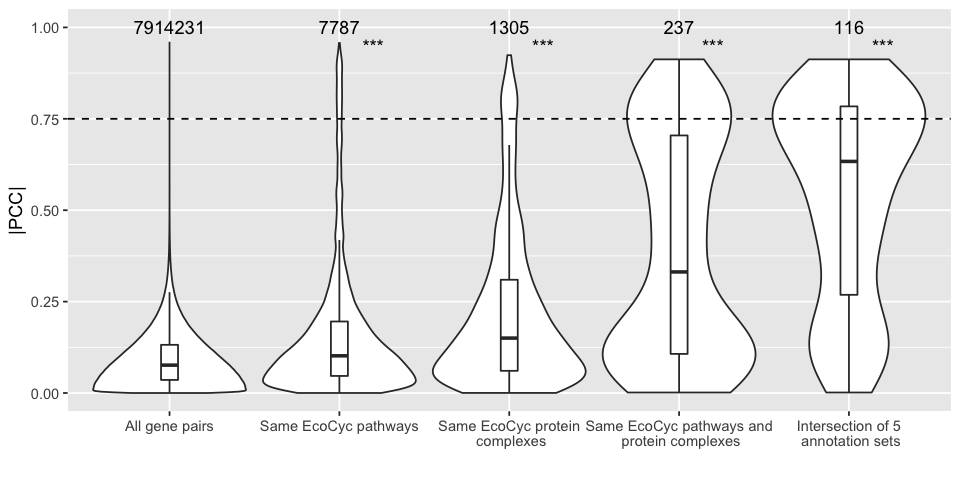

In [88]:


options(repr.plot.width = 8, repr.plot.height = 4)

p+
#annotate(geom="text", x=0.5, y=1, label="No. of pairs: ",color="black",size=2)+

annotate(geom="text", x=2.2, y=.95, label="***",color="black")+
annotate(geom="text", x=3.2, y=.95, label="***",color="black")+
annotate(geom="text", x=4.2, y=.95, label="***",color="black")+
annotate(geom="text", x=5.2, y=.95, label="***",color="black")+

annotate(geom="text", x=1, y=1, label=dim(df_all)[1],color="black")+
annotate(geom="text", x=2, y=1, label=dim(df1)[1],color="black")+
annotate(geom="text", x=3, y=1, label=dim(df2)[1],color="black")+
annotate(geom="text", x=4, y=1, label=dim(df3)[1],color="black")+
annotate(geom="text", x=5, y=1, label=dim(df4)[1],color="black")+

#annotate(geom="text", x=1.1, y=.8, label="1274(0.16%)",color="black",hjust=0)+  #these are optional annotations
#annotate(geom="text", x=2.1, y=.8, label="252(3.2%)",color="black",hjust=0)+
#annotate(geom="text", x=3.1, y=.8, label="64(4.9%)",color="black",hjust=0)+
#annotate(geom="text", x=4.1, y=.8, label="46(19%)",color="black",hjust=0)+
#annotate(geom="text", x=5.1, y=.8, label="35(30%)",color="black",hjust=0)+



geom_hline(yintercept=0.75,linetype="dashed") #this is an empirical cutoff






#ggsave(filename="fig2.pdf",width = 8,height = 4) #this automatically saves the last figure

In [103]:
similarity_column="mi_ternary"
y_lab="log10(Mutual Information)"


##pwy
coAnnotated= ( df$pwy==1 )
pwy=df[[similarity_column]][coAnnotated]


##pcomplex
coAnnotated= ( df$pcomplex==1 )
pcomplex=df[[similarity_column]][coAnnotated]

##pwy and pcomplex 
coAnnotated= ( rowSums(df[,c("pwy","pcomplex")])==2 )
pwyANDpcomplex=df[[similarity_column]][coAnnotated]


#all_annotSet
coAnnotated= ( rowSums(df[,c("pwy","pcomplex","operon","regulon","kegg_modules")])==5 )
all_annotSet=df[[similarity_column]][coAnnotated]


# all
All=df[[similarity_column]]



# create dfs for ggplots
df_all=data.frame(all=log10(All+10e-7))
df1 = data.frame(pwy=log10(pwy+10e-7))
df2 = data.frame(ptcom=log10(pcomplex+10e-7))
df3=data.frame(pwyANDpcomplex=log10(pwyANDpcomplex+10e-7))
df4=data.frame(all_annotSet=log10(all_annotSet+10e-7))


xlabs=c("All gene pairs","Same pathways","Same protein\n complexes","Same pathways and\n protein complexes",
        "Intersection of 5\n annotation sets")

p2=ggplot() +
  geom_violin(data = df_all,aes(xlabs[1],all)) +
  geom_boxplot(data = df_all,aes(xlabs[1],all),width=0.1,outlier.shape = NA)+
  geom_violin(data = df1,aes(xlabs[2],pwy)) +
  geom_boxplot(data = df1,aes(xlabs[2],pwy),width=0.1,outlier.shape = NA)+
  geom_violin(data = df2,aes(xlabs[3],ptcom))+
  geom_boxplot(data = df2,aes(xlabs[3],ptcom),width=0.1,outlier.shape = NA)+
  geom_violin(data = df3,aes(xlabs[4],pwyANDpcomplex))+
  geom_boxplot(data = df3,aes(xlabs[4],pwyANDpcomplex),width=0.1,outlier.shape = NA)+
  geom_violin(data = df4,aes(xlabs[5],all_annotSet))+
  geom_boxplot(data = df4,aes(xlabs[5],all_annotSet),width=0.1,outlier.shape = NA)+
  scale_x_discrete("",limits=xlabs)+ 

  #I want the x axis to be empty. And if I don't use this, the order is not right
  scale_y_continuous(name=y_lab)



In [54]:
#summary(df_all) #Median: 0.00 #Mean: 0.00062
#summary(df1) #Median: 0.00 #Mean: 0.014
#summary(df2) #Median: 0.00 #Mean: 0.014
#summary(df3) #Median: 4.146e-05 #Mean: 0.039
#summary(df4) #Median: 0.035 #Mean: 0.057

In [55]:
#significance test
wilcox.test(pwy,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(pcomplex,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(pwyANDpcomplex,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(all_annotSet,All,alternative="greater") #p-value < 2.2e-16


	Wilcoxon rank sum test with continuity correction

data:  pwy and All
W = 3.8764e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  pcomplex and All
W = 6159606742, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  pwyANDpcomplex and All
W = 1.305e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  all_annotSet and All
W = 760892824, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


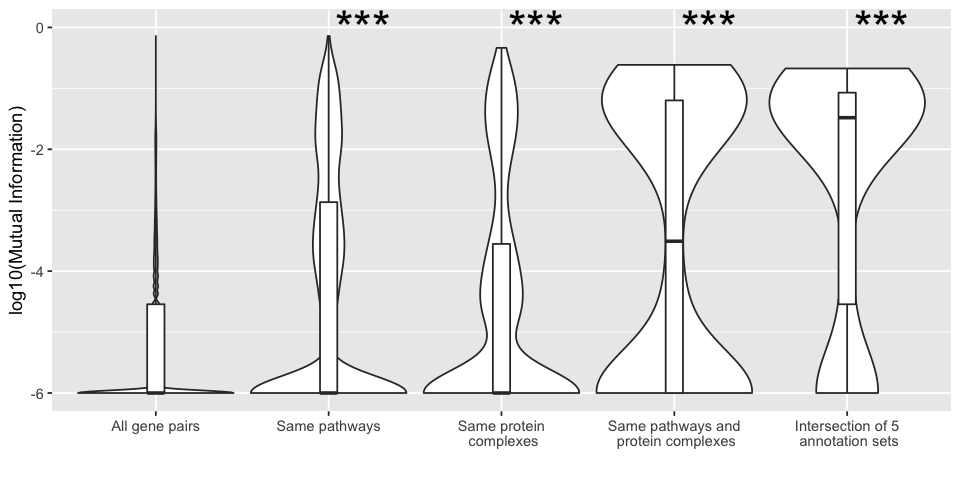

In [104]:
options(repr.plot.width = 8, repr.plot.height = 4)
p2+
annotate(geom="text", x=2.2, y=0, label="***",color="black",size=10)+
annotate(geom="text", x=3.2, y=0, label="***",color="black",size=10)+
annotate(geom="text", x=4.2, y=0, label="***",color="black",size=10)+
annotate(geom="text", x=5.2, y=0, label="***",color="black",size=10)

#ggsave(filename="fig6.pdf",width = 8,height = 4) #this automatically saves the last figure

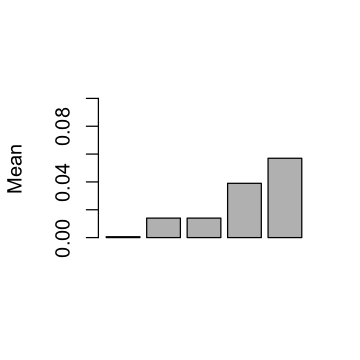

In [34]:
#bargraph for the means
options(repr.plot.width = 3, repr.plot.height = 3)
barplot(c(0.00062,0.014,0.014,0.039,0.057),ylim=c(0,0.1),ylab="Mean",cex.axis=1)

In [108]:
similarity_column="mi_ternary_collapsedCond"
y_lab="log10(Mutual Information)"


##pwy
coAnnotated= ( df$pwy==1 )
pwy=df[[similarity_column]][coAnnotated] #I am converting distance back to similarity


##pcomplex
coAnnotated= ( df$pcomplex==1 )
pcomplex=df[[similarity_column]][coAnnotated]

##pwy and pcomplex 
coAnnotated= ( rowSums(df[,c("pwy","pcomplex")])==2 )
pwyANDpcomplex=df[[similarity_column]][coAnnotated]


#all_annotSet
coAnnotated= ( rowSums(df[,c("pwy","pcomplex","operon","regulon","kegg_modules")])==5 )
all_annotSet=df[[similarity_column]][coAnnotated]


# all
All=df[[similarity_column]]

In [109]:
# create dfs for ggplots
df_all=data.frame(all=log10(All+10e-7))
df1 = data.frame(pwy=log10(pwy+10e-7))
df2 = data.frame(ptcom=log10(pcomplex+10e-7))
df3=data.frame(pwyANDpcomplex=log10(pwyANDpcomplex+10e-7))
df4=data.frame(all_annotSet=log10(all_annotSet+10e-7))


xlabs=c("All gene pairs","Same pathways","Same protein\n complexes","Same pathways and\n protein complexes",
        "Intersection of 5\n annotation sets")

p2=ggplot() +
  geom_violin(data = df_all,aes(xlabs[1],all)) +
  geom_boxplot(data = df_all,aes(xlabs[1],all),width=0.1,outlier.shape = NA)+
  geom_violin(data = df1,aes(xlabs[2],pwy)) +
  geom_boxplot(data = df1,aes(xlabs[2],pwy),width=0.1,outlier.shape = NA)+
  geom_violin(data = df2,aes(xlabs[3],ptcom))+
  geom_boxplot(data = df2,aes(xlabs[3],ptcom),width=0.1,outlier.shape = NA)+
  geom_violin(data = df3,aes(xlabs[4],pwyANDpcomplex))+
  geom_boxplot(data = df3,aes(xlabs[4],pwyANDpcomplex),width=0.1,outlier.shape = NA)+
  geom_violin(data = df4,aes(xlabs[5],all_annotSet))+
  geom_boxplot(data = df4,aes(xlabs[5],all_annotSet),width=0.1,outlier.shape = NA)+
  scale_x_discrete("",limits=xlabs)+ 
  #I want the x axis to be empty. And if I don't use this, the order is not right
  scale_y_continuous(name=y_lab)

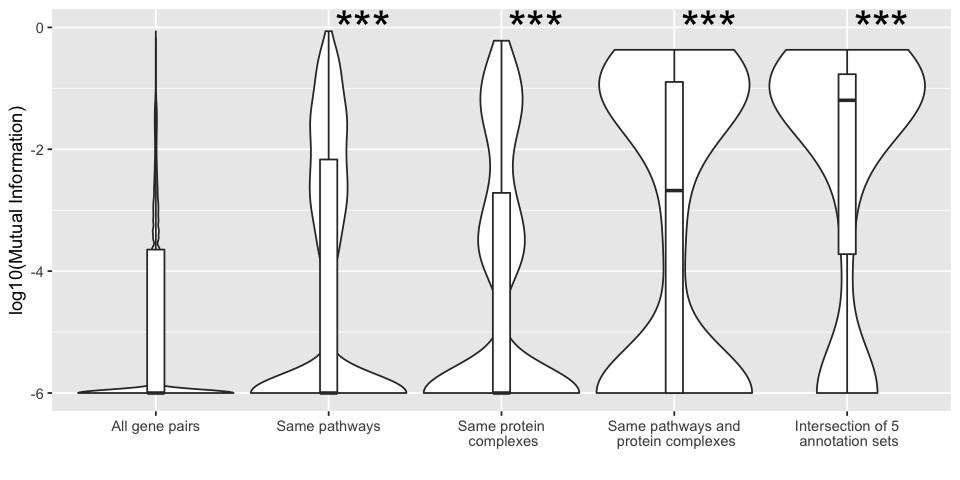

In [110]:
options(repr.plot.width = 8, repr.plot.height = 4)
p2+
  annotate(geom="text", x=2.2, y=0, label="***",color="black",size=10)+
  annotate(geom="text", x=3.2, y=0, label="***",color="black",size=10)+
  annotate(geom="text", x=4.2, y=0, label="***",color="black",size=10)+
  annotate(geom="text", x=5.2, y=0, label="***",color="black",size=10)

In [10]:
#significance test
wilcox.test(pwy,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(pcomplex,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(pwyANDpcomplex,All,alternative="greater") #p-value < 2.2e-16
wilcox.test(all_annotSet,All,alternative="greater") #p-value < 2.2e-16


	Wilcoxon rank sum test with continuity correction

data:  pwy and All
W = 3.8697e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  pcomplex and All
W = 6173333512, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  pwyANDpcomplex and All
W = 1.302e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  all_annotSet and All
W = 758503286, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


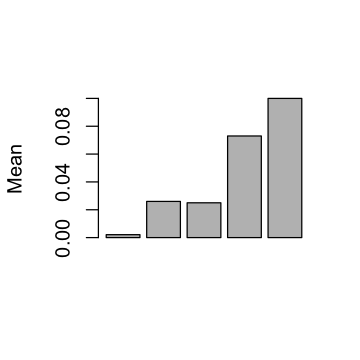

In [111]:
#summary(df_all) #Median: 0  #Mean: 0.0021
#summary(df1) #Median: 0  #Mean: 0.026
#summary(df2) #Median: 0  #Mean: 0.025
#summary(df3) #Median: 0.0021  #Mean: 0.073
#summary(df4) #Median: 0.064  #Mean: 0.10

#bargraph for the means
options(repr.plot.width = 3, repr.plot.height = 3)
barplot(c(0.0021,0.026,0.025,0.073,0.10),ylim=c(0,0.1),ylab="Mean",cex.axis=1)

In [112]:
#See if distribution of ternary VS. ternary-collapsed are different 


#ternary
#=======================================================================================
similarity_column="mi_ternary"
y_lab="Mutual Information"


##pwy
coAnnotated= ( df$pwy==1 )
pwy=df[[similarity_column]][coAnnotated] #I am converting distance back to similarity


##pcomplex
coAnnotated= ( df$pcomplex==1 )
pcomplex=df[[similarity_column]][coAnnotated]

##pwy and pcomplex 
coAnnotated= ( rowSums(df[,c("pwy","pcomplex")])==2 )
pwyANDpcomplex=df[[similarity_column]][coAnnotated]


#all_annotSet
coAnnotated= ( rowSums(df[,c("pwy","pcomplex","operon","regulon","kegg_modules")])==5 )
all_annotSet=df[[similarity_column]][coAnnotated]


# all
All=df[[similarity_column]]


ternary_list=list(pwy,pcomplex,pwyANDpcomplex,all_annotSet,All)
#=======================================================================================




#ternary-collapsed conditions
#=======================================================================================
similarity_column="mi_ternary_collapsedCond"
y_lab="Mutual Information"


##pwy
coAnnotated= ( df$pwy==1 )
pwy=df[[similarity_column]][coAnnotated] #I am converting distance back to similarity


##pcomplex
coAnnotated= ( df$pcomplex==1 )
pcomplex=df[[similarity_column]][coAnnotated]

##pwy and pcomplex 
coAnnotated= ( rowSums(df[,c("pwy","pcomplex")])==2 )
pwyANDpcomplex=df[[similarity_column]][coAnnotated]


#all_annotSet
coAnnotated= ( rowSums(df[,c("pwy","pcomplex","operon","regulon","kegg_modules")])==5 )
all_annotSet=df[[similarity_column]][coAnnotated]


# all
All=df[[similarity_column]]


ternary_cond_collapsed_list=list(pwy,pcomplex,pwyANDpcomplex,all_annotSet,All)
#=======================================================================================




##significance test
mapply(function(x,y) wilcox.test(x,y,alternative="greater") , x=ternary_cond_collapsed_list, y=ternary_list)
 
## this is just my older way to do it:
#wilcox.test(ternary_cond_collapsed_list[[1]],ternary_list[[1]],alternative="greater")
#wilcox.test(ternary_cond_collapsed_list[[2]],ternary_list[[2]],alternative="greater")
#wilcox.test(ternary_cond_collapsed_list[[3]],ternary_list[[3]],alternative="greater")
#wilcox.test(ternary_cond_collapsed_list[[4]],ternary_list[[4]],alternative="greater")
#wilcox.test(ternary_cond_collapsed_list[[5]],ternary_list[[5]],alternative="greater")

       
# conclusion: after collapsing conditions, there is a significant increase in the mean for each violin

statistic,40189241,1149986,35974,8395,4.789245e+13
parameter,NULL,NULL,NULL,NULL,NULL
p.value,1.7791e-280,1.328463e-56,4.457772e-08,0.0005452559,0
null.value,0,0,0,0,0
alternative,greater,greater,greater,greater,greater
method,Wilcoxon rank sum test with continuity correction,Wilcoxon rank sum test with continuity correction,Wilcoxon rank sum test with continuity correction,Wilcoxon rank sum test with continuity correction,Wilcoxon rank sum test with continuity correction
data.name,x and y,x and y,x and y,x and y,x and y


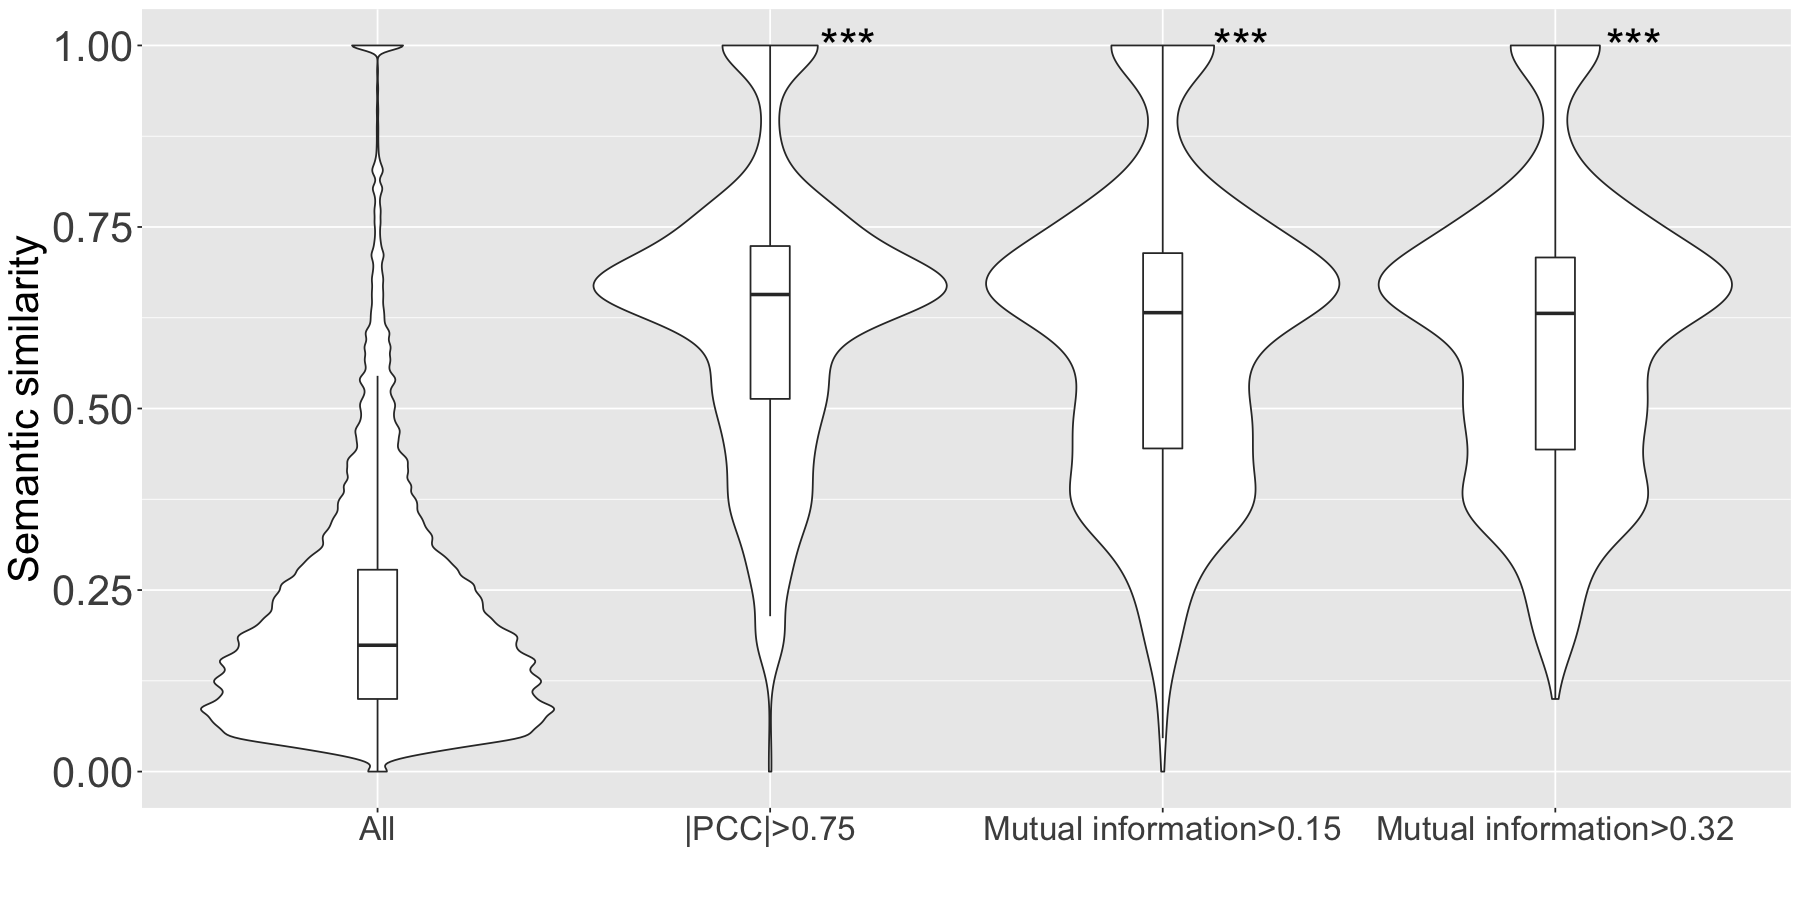

In [136]:
#Violin using GO annotations

options(repr.plot.width = 15, repr.plot.height = 15/2)

#get p5+p6
xlabs=c("All","|PCC|>0.75","Mutual information>0.15","Mutual information>0.32")
cutoffIndex=1274 #use this to determine the similarity score: eg. sort(1-df$mi_ternary,decreasing=T)[1274]



df=df
#mean(is.na(df$Wang_BP)) # ~56% of the similarity are NA

##the first box
#------------------------------------------------
box1=df$Wang_BP[!is.na(df$Wang_BP)]
#------------------------------------------------

##the second box
#------------------------------------------------
similarity="pcc"
box2=df$Wang_BP[order(abs(df[[similarity]]),decreasing=T)][1:cutoffIndex]
box2=box2[!is.na(box2)]
#------------------------------------------------

##the third box
#------------------------------------------------
similarity="mi_ternary"
box3=df$Wang_BP[order(df[[similarity]],decreasing=T)][1:cutoffIndex]
box3=box3[!is.na(box3)]
#------------------------------------------------

##the forth box
#------------------------------------------------
similarity="mi_ternary_collapsedCond"
box4=df$Wang_BP[order(df[[similarity]],decreasing=T)][1:cutoffIndex]
box4=box4[!is.na(box4)]
#------------------------------------------------


df_all=data.frame(All=box1)
df1=data.frame(aboveCutoff1=box2)
df2=data.frame(aboveCutoff2=box3)
df3=data.frame(aboveCutoff3=box4)


p7=ggplot() +
geom_violin(data = df_all,aes(xlabs[1],All)) +
geom_boxplot(data = df_all,aes(xlabs[1],All),width=0.1,outlier.shape = NA)+ #outlier.shape decides the shape of outliers. Here I don't let them show
geom_violin(data = df1,aes(xlabs[2],aboveCutoff1)) +
geom_boxplot(data = df1,aes(xlabs[2],aboveCutoff1),width=0.1,outlier.shape = NA)+
geom_violin(data = df2,aes(xlabs[3],aboveCutoff2)) +
geom_boxplot(data = df2,aes(xlabs[3],aboveCutoff2),width=0.1,outlier.shape = NA)+
geom_violin(data = df3,aes(xlabs[4],aboveCutoff3)) +
geom_boxplot(data = df3,aes(xlabs[4],aboveCutoff3),width=0.1,outlier.shape = NA)+
scale_x_discrete("",limits=xlabs)+ 
#I want the x axis to be empty. And if I don't use this, the order is not right
scale_y_continuous("Semantic similarity")+
theme(text=element_text(size=25), 
      axis.text.y=element_text(size=25),
      axis.title=element_text(size=25))

p7+
annotate(geom="text", x=2.2, y=1, label="***",color="black",size=10)+
annotate(geom="text", x=3.2, y=1, label="***",color="black",size=10)+
annotate(geom="text", x=4.2, y=1, label="***",color="black",size=10)

#ggsave(filename="fig8.pdf",width = 15,height = 15/2) #this automatically saves the last figure

In [114]:
#get the means
sapply(list(box1,box2,box3,box4),mean)

[1] 0.2170061 0.6285807 0.5975784 0.5928484

In [8]:
#significance test
wilcox.test(box2,box1,alternative="greater") #p-value < 2.2e-16
wilcox.test(box3,box1,alternative="greater") #p-value < 2.2e-16
wilcox.test(box4,box1,alternative="greater") #p-value < 2.2e-16


	Wilcoxon rank sum test with continuity correction

data:  box2 and box1
W = 3462526760, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  box3 and box1
W = 3470174380, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  box4 and box1
W = 3517613786, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


## Sensitivity & precision graphs

### Definitions

In [147]:
#functions to get confusion matrix based on annot and similarity
get_confusionMatrix=function(annot,similarity,seed=9){   
    df=df[,c(annot,similarity)]
        if(length(annot)>=2){
            coannotation=(rowSums(df[,annot])>=1) 
            #coannotation=(rowSums(df[,annot])>=length(annot)) this is A&B&...
            cumsum_=cumsum(coannotation[order(abs(df[,similarity]),decreasing=T)]) #p.s. taking additional abs() on mi doesn't matter
            return(confusionMatrix_metrics(cumsum_,seed=seed))
        } 
    
    cumsum_=cumsum(df[,annot][order(df[,similarity],decreasing=T)])
    return(confusionMatrix_metrics(cumsum_,seed=seed))
}

In [149]:
#This gets precison using the same combination of annotations as the violin plots
similarity="abs_pcc"
subset=5000

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix("pwy",similarity)[1:subset,]
con2=get_confusionMatrix("pcomplex",similarity)[1:subset,]
con3=get_confusionMatrix(c("pwy","pcomplex"),similarity)[1:subset,]
con4=get_confusionMatrix(c("pwy","pcomplex","operon","regulon","kegg_modules"),similarity,seed=123)[1:subset,]


annot_list=list(con1,con2,con3,con4)
names(annot_list)=c("Same pathway(s)","Same protein complex(es)","Same pathway(s) or protein complex(es)",
        "Union of 5 annotation set(s)")



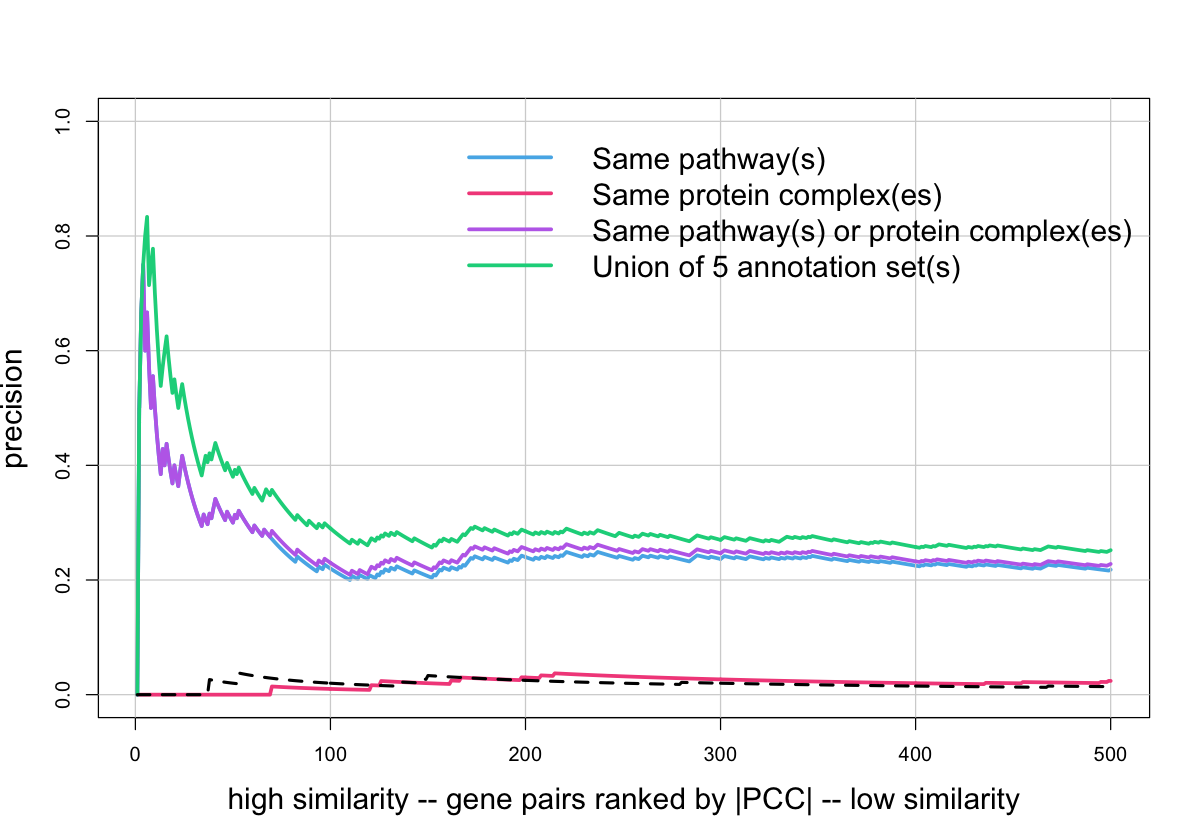

In [150]:
samples=1:500
cols=c("#56B4E9","#F3518A","#BE70EA","#09D38A")
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- gene pairs ranked by |PCC| -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=3

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd, cex.lab=1.5) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
    

}

legend(150, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1.5, box.lty=0) #box.lty=0 removes the legend border  

#add the negative control (this is the random for union of the 5 sets)
lines(samples,annot_list[[4]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)


#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve


#f=recordPlot()
#pdf(file = "fig3.pdf",width = 10,height = 7)
#replayPlot(f)
#dev.off()

In [121]:
#theoretical random precision for each co-annotation set (total co-annotations/7914231)

annot_list=list("pwy","pcomplex",c("pwy","pcomplex"),c("pwy","pcomplex","operon","regulon","kegg_modules"))

for(j in seq(annot_list)){
 
 if(length(annot_list[[j]])!=1){ #if there are more than 1 co-annotation, take the union
    coannotation=ifelse(rowSums(df[,annot_list[[j]]])>=1,1,0)
    
 }else{
    coannotation=df[,annot_list[[j]]]
 }    
    
 
    
 precision=sum(coannotation)/length(coannotation)   
 cat(precision,'\n')   
}


0.0009839238 
0.0001648928 
0.001118871 
0.02819301 


## With/Without minimal media

In [157]:
#generate a table that uses conditions without minimal media
load("Data/uniqueChemIndex.RData")
TF=( names(uniqueChemIndex) %in% c("NH4Cl (MOPS)","Iron excess-FeSO4","Iron starvation-FeSO4","Acetate (M9)",
                                   "Glucosamine (M9)","Glucose (M9)","Glycerol (M9)","Maltose (M9)","N-acetyl Glucosamine","Succinate (M9)") )
used_cond=names(uniqueChemIndex)[!TF]
cond_indices=unlist(uniqueChemIndex[used_cond])

#experiments:

##do corr VS annot excluding the minial media condition
##(I suspect this will give us a better result. There are only 10 minimal media conditions out of 324 conditions)
##correlate genes only based on the minimal media condition

table_1=df
load("Data/strain1strain2_allSimilarities_noMinimalMedia.RData")
table_2=left_join(strain1strain2_allSimilarities_noMinimalMedia,df[,1:7],by=c("strain1","strain2"))

In [124]:
get_confusionMatrix=function(df,annot,similarity,seed=9){   
  
  if(length(similarity)!=dim(df)[1]){ #if new similarity is in the the table, just retreive from the table
    similarity=df[,similarity]
    }
  df=cbind(df[,annot],similarity)
  
  if(length(annot)>=2){
    coannotation=(rowSums(df[,annot])>=1)
    #coannotation=(rowSums(df[,annot])>=length(annot)) this is A&B&...
    cumsum_=cumsum(coannotation[order(df[,dim(df)[2]],decreasing=T)])
    return(confusionMatrix_metrics(cumsum_,seed=seed))
  } 
  
  cumsum_=cumsum(df[,1][order(df[,2],decreasing=T)])
  return(confusionMatrix_metrics(cumsum_,seed=seed))
}

graph_corr_annot=function(metric,similarity,samples,subset,cols,ylim,xlim,lwd,annot_list,annot_list_name){
    
options(repr.plot.width = 10, repr.plot.height = 7)    
first=T
    
for(similarity_ in similarity){
    
    for(metric_ in metric){
        
        random_metric=paste0("random_",metric_)
        for(j in seq(annot_list)){
  
          #precalculate and subset to prevent memory problem
          con1=get_confusionMatrix(df=table_1,annot_list[[j]],similarity_,seed=123)[1:subset,]
          con2=get_confusionMatrix(df=table_2,annot_list[[j]],similarity_,seed=123)[1:subset,]


          exp_list=list(con1,con2)
          exp_1_name="All conditions"
          exp_2_name="Without minimal media"
          names(exp_list)=c(exp_1_name,exp_2_name)



          for(i in seq(exp_list)){
            if(i==1){
                                                  
              plot(samples,exp_list[[i]][[metric_]][samples],xlab="",ylab="",type='l',col=cols[i],
                   ylim=ylim,xlim=xlim,lwd = lwd,main=paste0("Same ",paste(annot_list_name[j],collapse=" "))) 
              grid(lty='solid')

                
            }else{
              lines(samples,exp_list[[i]][[metric_]][samples],col=cols[i],lwd = lwd) 
            }


          }

          legend(200, 1.04, legend=names(exp_list),
                 col=cols, lty=1,lwd = lwd, cex=1, box.lty=0) 

          #add the negative control
          lines(samples,exp_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)
  
}
}


  } 
}    

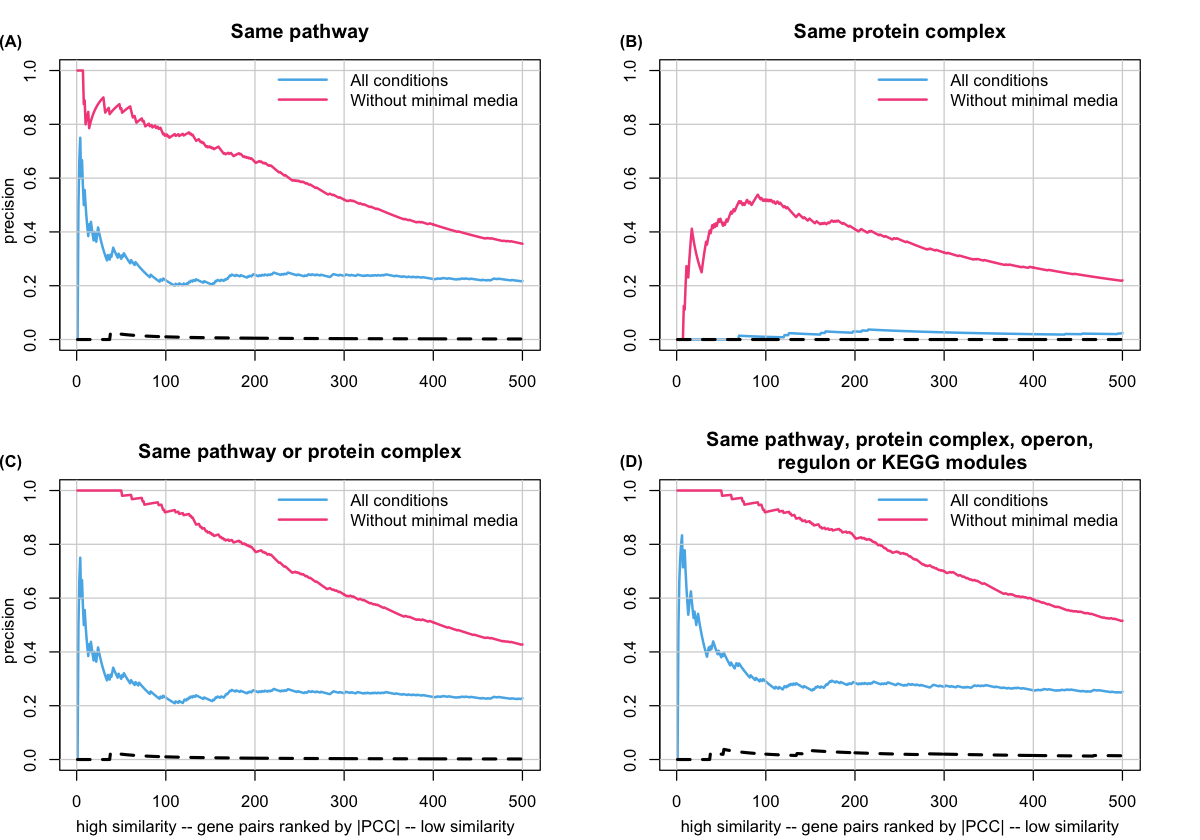

In [125]:
##compare: pwy - pwy with no minimal media, ptcomplex...., any annotation

##iterate through all parameters

#This uses the same combination of annotations as the violin plots
metric="precision" #this is a highly imbalanced dataset so I will not use accuracy or specificity
similarity="abs_pcc"
samples=1:500
subset=500
cols=c("#56B4E9","#F3518A")
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=2
annot_list=list("pwy","pcomplex",c("pwy","pcomplex"),c("pwy","pcomplex","operon","regulon","kegg_modules"))
annot_list_name=c("pathway","protein complex",
                  "pathway or protein complex",
                  "pathway, protein complex, operon,\n regulon or KEGG modules"
                 )

par(mfrow=c(2,2),mar=c(3.5,3,3,3),oma=c(0,0,0,0))
graph_corr_annot(metric,similarity,samples,subset,cols,ylim,xlim,lwd,annot_list,annot_list_name)

## add x and y-axis (https://stackoverflow.com/questions/11198767/how-to-annotate-across-or-between-plots-in-multi-plot-panels-in-r)
text(grconvertX(.087, "ndc", "user"), grconvertY(.75, "ndc", "user"), "precision", srt=90, xpd=NA)
text(grconvertX(.087, "ndc", "user"), grconvertY(.25, "ndc", "user"), "precision", srt=90, xpd=NA)
text(grconvertX(0.3, "ndc", "user"), grconvertY(0.015, "ndc", "user"), "high similarity -- gene pairs ranked by |PCC| -- low similarity", xpd=NA)
text(grconvertX(0.75, "ndc", "user"), grconvertY(0.015, "ndc", "user"), "high similarity -- gene pairs ranked by |PCC| -- low similarity", xpd=NA)

# add (A), (B), (C), (D)
text(grconvertX(.088, "ndc", "user"), grconvertY(0.95, "ndc", "user"), "(A)", xpd=NA,font=2)
text(grconvertX(.55, "ndc", "user"), grconvertY(0.95, "ndc", "user"), "(B)", xpd=NA,font=2)
text(grconvertX(.088, "ndc", "user"), grconvertY(0.45, "ndc", "user"), "(C)", xpd=NA,font=2)
text(grconvertX(.55, "ndc", "user"), grconvertY(0.45, "ndc", "user"), "(D)", xpd=NA,font=2)




#f=recordPlot()
#pdf(file = "fig4.pdf",width = 10,height = 15/2)
#replayPlot(f)
#dev.off()

## Different similarity metrics

In [154]:
#functions to get confusion matrix based on annot and similarity
get_confusionMatrix=function(table_,annot,similarity,seed=9){   
    df=table_[,c(annot,similarity)]
        if(length(annot)>=2){
            coannotation=(rowSums(df[,annot])>=1)
            #coannotation=(rowSums(df[,annot])>=length(annot)) this is A&B&...
            cumsum_=cumsum(coannotation[order(df[,similarity],decreasing=T)])
            return(confusionMatrix_metrics(cumsum_,seed=seed))
        } 
    
    cumsum_=cumsum(df[,annot][order(df[,similarity],decreasing=T)])
    return(confusionMatrix_metrics(cumsum_,seed=seed))
}

In [158]:
#This gets precison using the same combination of annotations as the violin plots
subset=500

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"pcc",seed=1009)[1:subset,]
con2=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi",seed=1009)[1:subset,]
con3=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"spearman",seed=1009)[1:subset,]

annot_list=list(con1,con2,con3)
names(annot_list)=c("PCC","MI","Spearman")

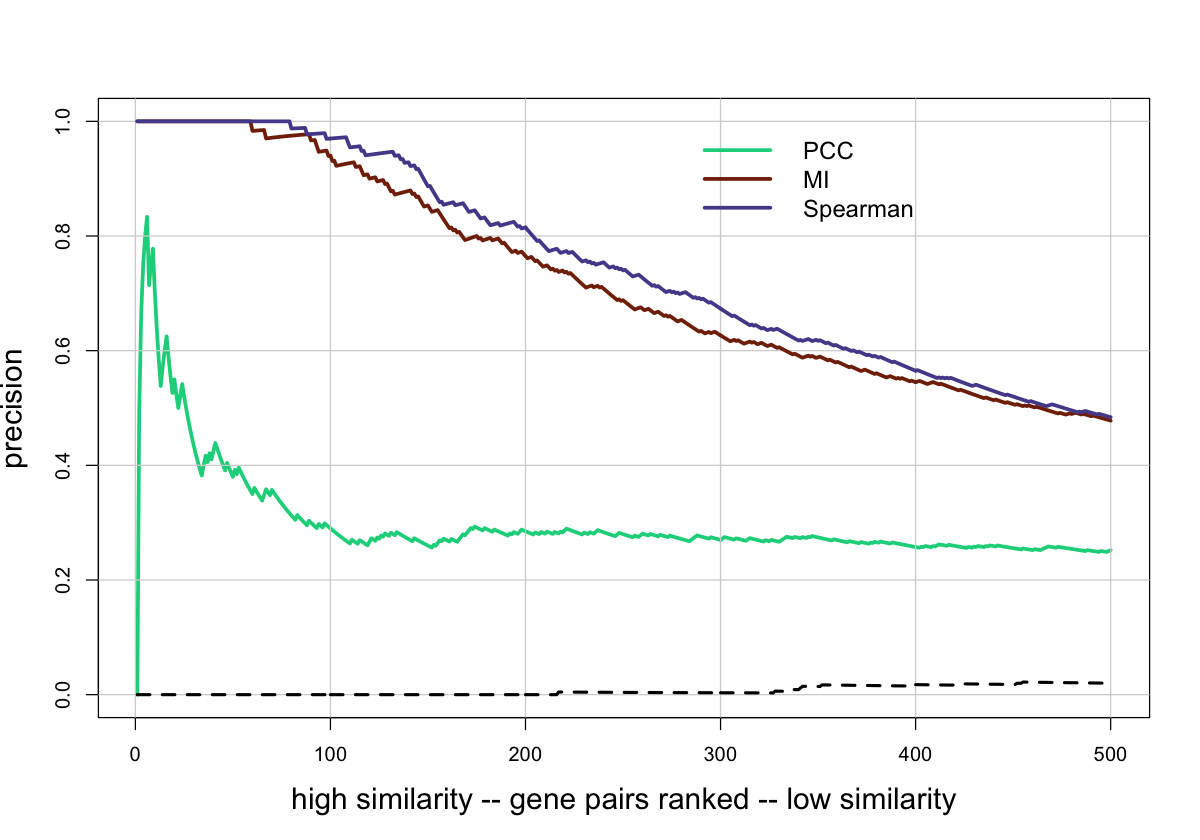

In [159]:
samples=1:500
cols=c("#09D38A","#832B05","#564c99")
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- gene pairs ranked -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=3

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd, cex.lab=1.5) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
}


legend(275, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1.2, box.lty=0) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)


#f=recordPlot()
#pdf(file = "fig5.pdf",width = 10,height = 15/2)
#replayPlot(f)
#dev.off()


#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve

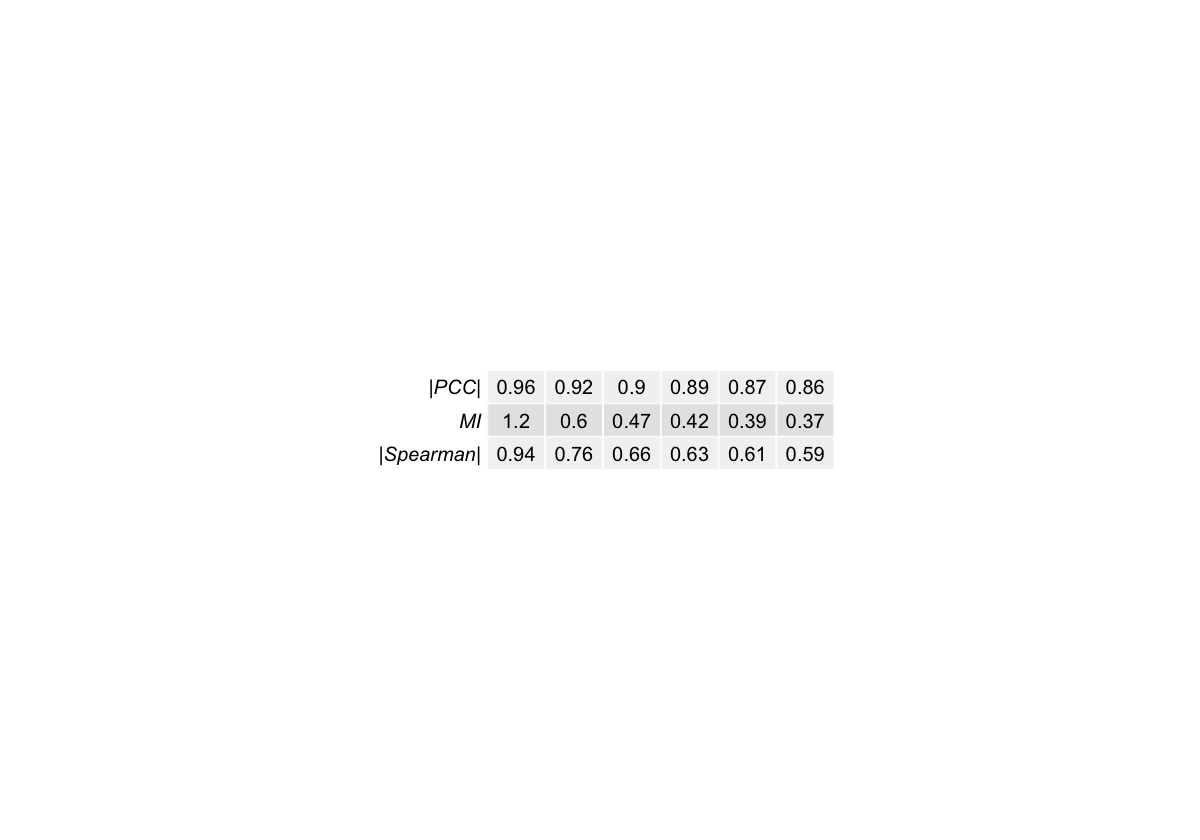

In [160]:
#Add the cutoff table

##similarity cutoffs for the 1st pair and 100, 200, 300, 400, 500 : 

cutoffs_=data.frame(numeric(6),numeric(6),numeric(6))
names(cutoffs_)=c("|PCC|","MI","|Spearman|")
similarity=c("abs_pcc","mi","spearman")
for(i in seq(similarity)){     
    table_=table_1    
    cutoffs_[,i]=(sort(table_[,similarity[i]],decreasing=T))[c(1,100,200,300,400,500)] %>% round(2)        
}


cutoffs_=t(cutoffs_)
grid.table(cutoffs_) ##plot a table as a graph: https://cran.r-project.org/web/packages/gridExtra/vignettes/tableGrob.html

In [161]:
## without minimal media
con1=get_confusionMatrix(table_2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"pcc",seed=1009)[1:subset,]
con2=get_confusionMatrix(table_2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi",seed=1009)[1:subset,]
con3=get_confusionMatrix(table_2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"spearman",seed=1009)[1:subset,]

annot_list=list(con1,con2,con3)
names(annot_list)=c("PCC","MI","Spearman")

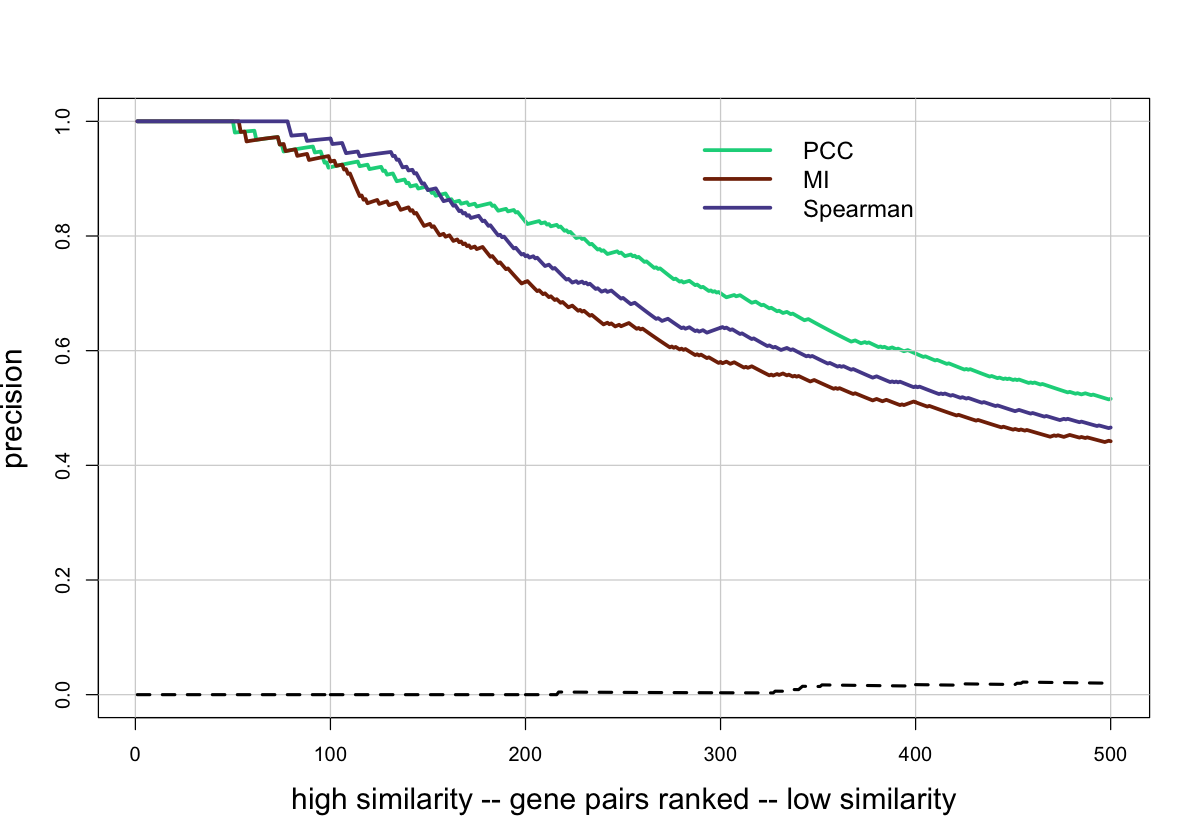

In [162]:
samples=1:500
cols=c("#09D38A","#832B05","#564c99")
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- gene pairs ranked -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=3

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd, cex.lab=1.5) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
}


legend(275, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1.2, box.lty=0) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)


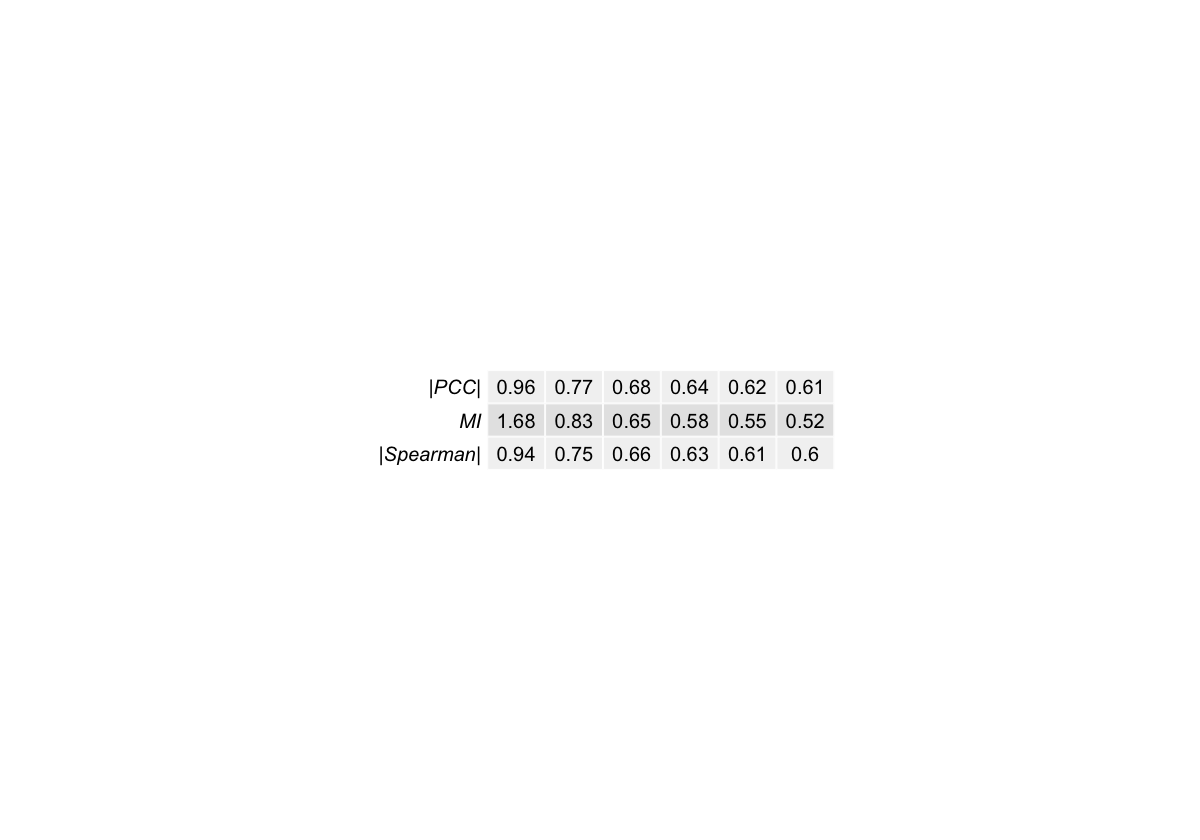

In [163]:
#Add the cutoff table

##similarity cutoffs for the 1st pair and 100, 200, 300, 400, 500 : 

cutoffs_=data.frame(numeric(6),numeric(6),numeric(6))
names(cutoffs_)=c("|PCC|","MI","|Spearman|")
similarity=c("abs_pcc","mi","spearman")
for(i in seq(similarity)){     
    table_=table_2    
    cutoffs_[,i]=(sort(table_[,similarity[i]],decreasing=T))[c(1,100,200,300,400,500)] %>% round(2)        
}


cutoffs_=t(cutoffs_)
grid.table(cutoffs_) ##plot a table as a graph: https://cran.r-project.org/web/packages/gridExtra/vignettes/tableGrob.html

In [75]:
#This gets precison using the same combination of annotations as the violin plots
subset=5000

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"pcc",seed=1009)[1:subset,]
con2=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi")[1:subset,]
con3=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"spearman")[1:subset,]

annot_list=list(con1,con2,con3)
names(annot_list)=c("PCC","MI","Spearman")

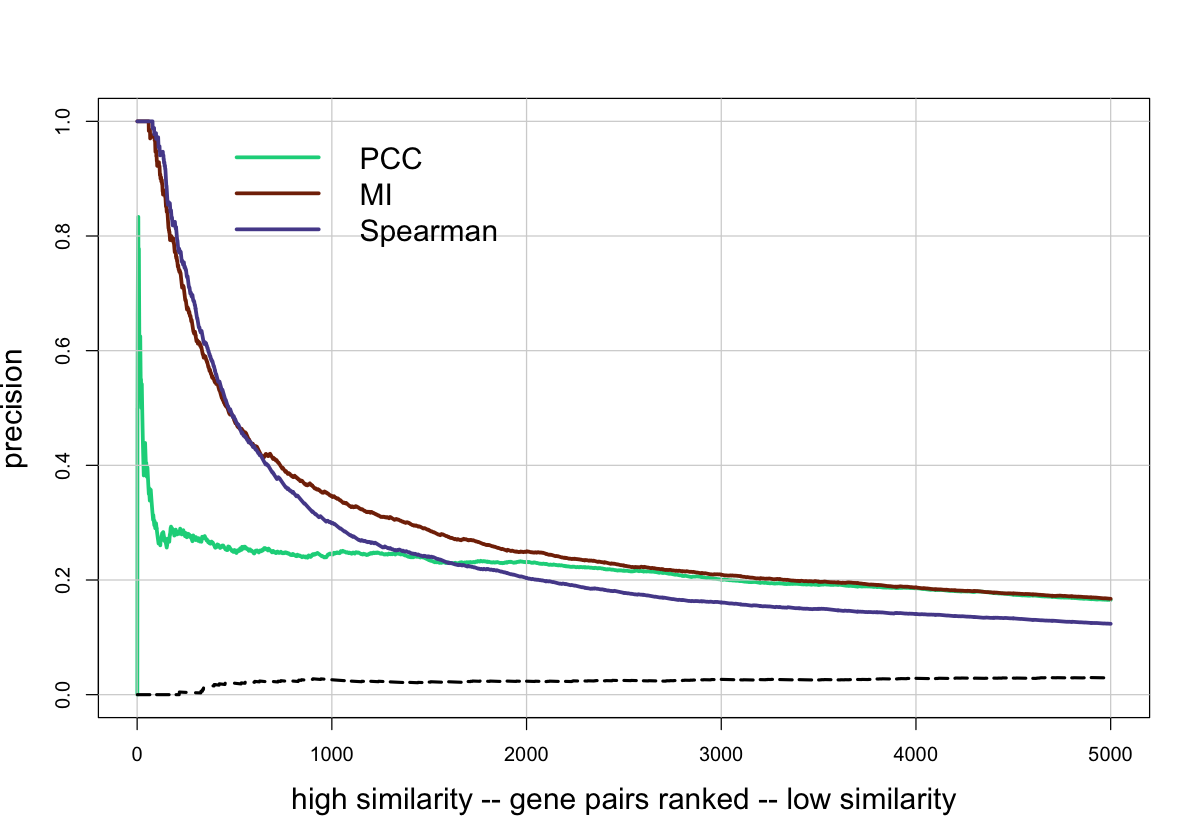

In [25]:
samples=1:5000
cols=c("#09D38A","#832B05","#564c99")
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- gene pairs ranked -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=3

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd, cex.lab=1.5) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
    

}

legend(300, 1, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1.5, box.lty=0) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)


#f=recordPlot()
#pdf(file = "fig5.pdf",width = 10,height = 15/2)
#replayPlot(f)
#dev.off()


#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve

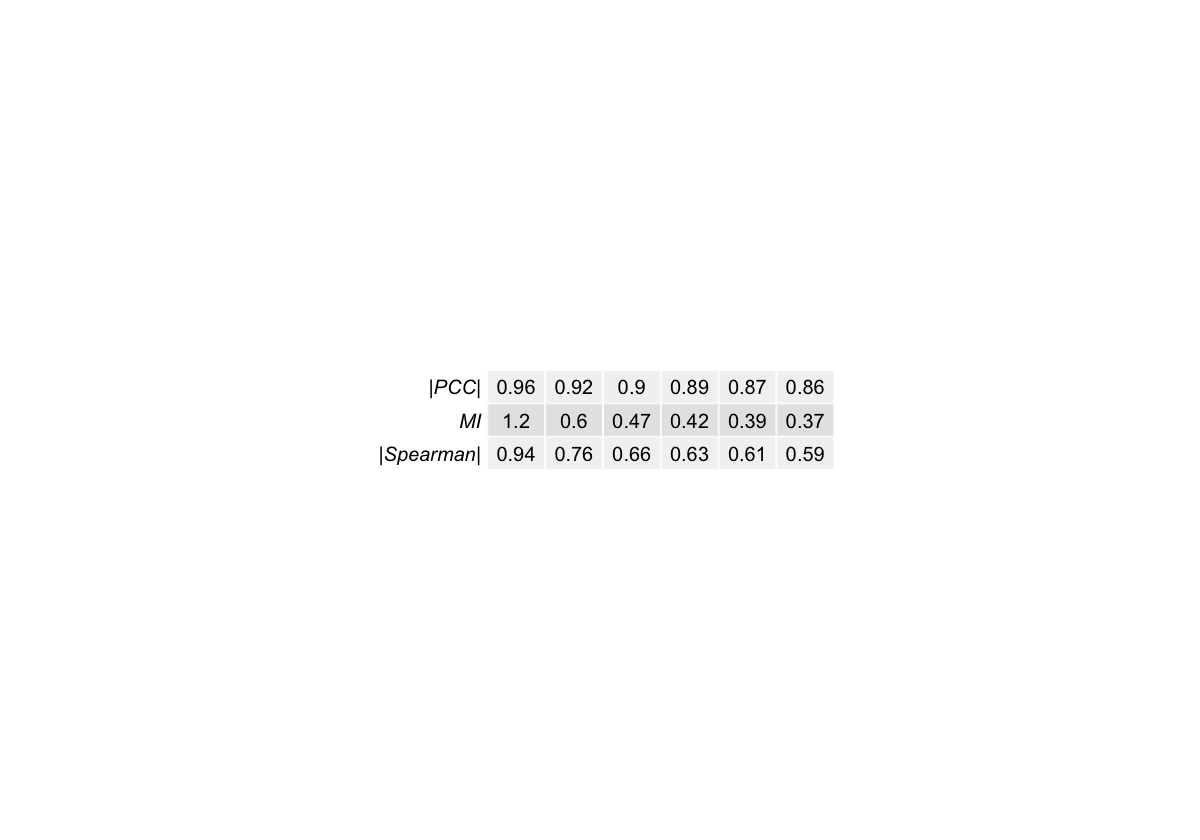

In [320]:
#Add the cutoff table

##similarity cutoffs for the 1st pair and 100, 200, 300, 400, 500 : 

cutoffs_=data.frame(numeric(6),numeric(6),numeric(6))
names(cutoffs_)=c("|PCC|","MI","|Spearman|")
similarity=c("abs_pcc","mi","spearman")
for(i in seq(similarity)){
 cutoffs_[,i]=(sort(df[,similarity[i]],decreasing=T))[c(1,100,200,300,400,500)] %>% round(2)        
}

cutoffs_=t(cutoffs_)
grid.table(cutoffs_) ##plot a table as a graph: https://cran.r-project.org/web/packages/gridExtra/vignettes/tableGrob.html


#f=recordPlot()
#pdf(file = "fig5_2.pdf",width = 10,height = 15/2)
#replayPlot(f)
#dev.off()

In [164]:
#This gets precison using the same combination of annotations as the violin plots
subset=500

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi",seed=1009)[1:subset,]
con2=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi_ternary",seed=1009)[1:subset,]
con3=get_confusionMatrix(table_1,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi_ternary_collapsedCond",seed=1009)[1:subset,]


annot_list=list(con1,con2,con3)
names(annot_list)=c("MI","MI on ternary data","MI on ternary data - Conditions collapsed")

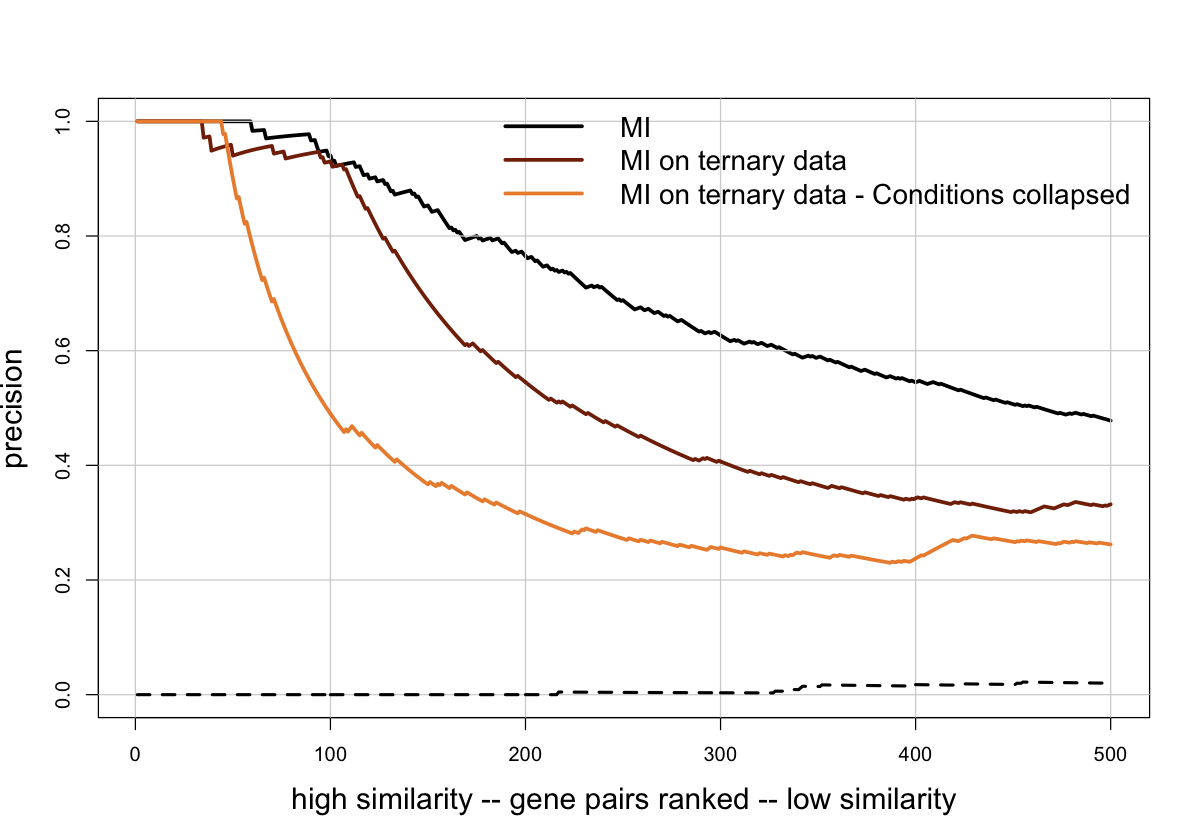

In [165]:
samples=1:500
cols=c("black","#832B05","#EC8D3A") 
metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- gene pairs ranked -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=3

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=cols[i],
           ylim=ylim,xlim=xlim,lwd = lwd, cex.lab=1.5) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=cols[i],lwd = lwd) 
    }
    

}

legend(170, 1.05, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1.4, box.lty=0) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)


#f=recordPlot()
#pdf(file = "fig7.pdf",width = 10,height = 15/2)
#replayPlot(f)
#dev.off()

#I have intuition that this graph should use "or" instead of "and". 
#Reasoning (junior high school math): using "and" will always drive down the precison, while if "or" is used:
##1. if annotations are good, precision goes up
##2. if annotations are bad, precision doesn't improve

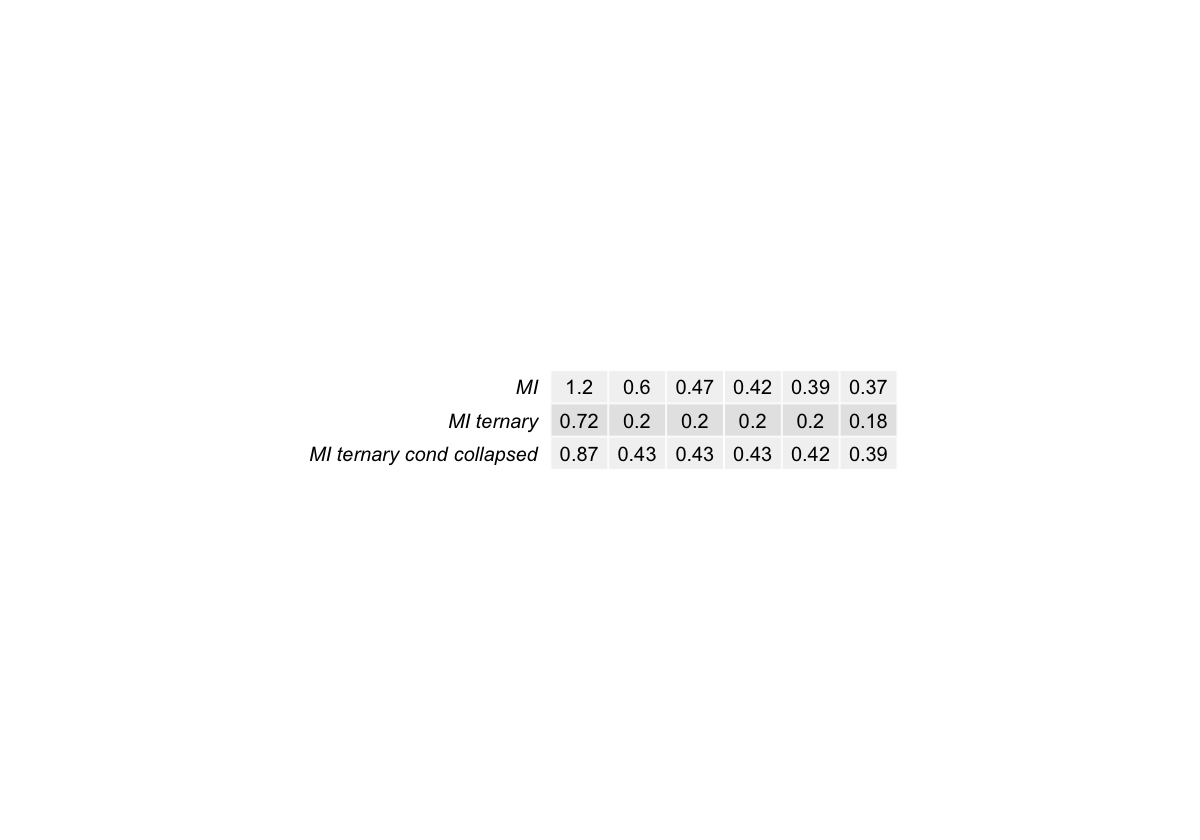

In [78]:
#Add the cutoff table

##similarity cutoffs for the 1st pair and 100, 200, 300, 400, 500 : 

cutoffs_=data.frame(numeric(6),numeric(6),numeric(6))
names(cutoffs_)=c("MI","MI ternary","MI ternary cond collapsed")
similarity=c("mi","mi_ternary","mi_ternary_collapsedCond")
for(i in seq(similarity)){
 cutoffs_[,i]=(sort(df[,similarity[i]],decreasing=T))[c(1,100,200,300,400,500)] %>% round(2)        
}

cutoffs_=t(cutoffs_)
grid.table(cutoffs_) ##plot a table as a graph: https://cran.r-project.org/web/packages/gridExtra/vignettes/tableGrob.html

#f=recordPlot()
#pdf(file = "fig7_2.pdf",width = 10,height = 15/2)
#replayPlot(f)
#dev.off()